# Lab 4 - Part B: Building models to optimise a function
The goal of this part of the practical is to implement steepest descent and Newton's method on a two-dimensional function.

This code finds the optimum of Rosenbrock's function - the definition is in the class `Rosenbrock` in [functions.py](functions.py) - look it up on the web! In order to make this work you will need to calculate the first and second derivatives of the function by hand, and then implement them in the `Rosenbrock` class. 

### Import modules

In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('machinevision.mplstyle')

from functions import rosenbrock
from optimisation import SteepestDescent, NewtonMethod, optimise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define model and create data

In [86]:
x1, x2 = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
x = np.stack((x1, x2))
w = rosenbrock(x)

# Perform optimisation
Newton's method for optimisation has been implemented for you in [optimisation.py](optimisation.py), as the function named '`optimise`'. Given a start position and tolerance, '`optimise`' can optimize different functions. Each (mathematical) function is passed in as a class definition, which is expected to implement three methods so that '`optimise`' can apply Newton's method: 
1. '`call`' : returns the function value at a given `x` 
2. '`jacobian`' : returns the jacobian for that function at a given `x` 
3. '`hessian`' : returns the hessian for that function at a given `x` 

**TODO:** Here we will be optimizing the Rosenbrock function. You can find a placeholder for this function in [functions.py](functions.py). Complete the '`jacobian'` and '`hesian`' methods, and verify that '`optimise`'  correctly finds the minimum of the Rosenbrock function. You may assume `x` two-dimensional.

In [87]:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=NewtonMethod)

Iteration    1, Function 4.731547058170665
Iteration    2, Function 4.045594387999576
Iteration    3, Function 3.159866765481352
Iteration    4, Function 1.9546545285508727
Iteration    5, Function 1.2536699924624037
Iteration    6, Function 0.6661552741936907
Iteration    7, Function 0.32398508887513144
Iteration    8, Function 0.10964145680663083
Iteration    9, Function 0.02050229403811994
Iteration   10, Function 6.284762525208569e-05
Iteration   11, Function 1.746351436111606e-07
Iteration   12, Function 5.160758723456504e-13


# Visualise results

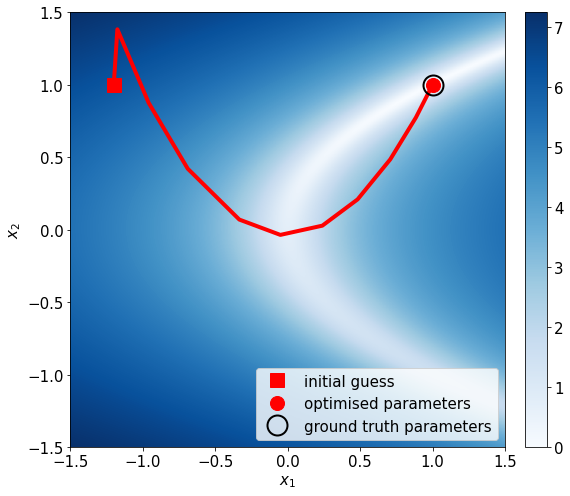

In [88]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');

# Things to investigate once you have gotten this to work

If you have correctly implemented the derivatives then the optimised parameters should have converged to approximately the same as the ground truth minimum. Great! Now try the extra tasks outlined below:

1. Change the routine to use steepest descent (Eq B.4 in the book's Appendix, page 603) rather than Newton's method. This has been defined in the same way as Newton's method in [optimisation.py](optimisation.py) - you just need to specify the update rule.
2. Implement the first derivative using finite differences rather than explicitly writing down the derivative. You may want to use the class in [numerical.py](numerical.py) for this.

In [120]:
import functions
import numerical
x1, x2 = np.mgrid[-1.5:1.5:0.01, -1.5:1.5:0.01]
x = np.stack((x1, x2))
rosenbrock = numerical.finite_difference(functions.Rosenbrock)
w = rosenbrock(x)

In [121]:
start_position = np.array([[-1.2, 1]]).T
x_optimisation, w_optimisation = optimise(start_position, tolerance=1e-5, function=rosenbrock,
                                          optimiser=SteepestDescent)

Iteration    1, Function 4.128119838945179
Iteration    2, Function 2.8317167856368926
Iteration    3, Function 2.6504481107057094
Iteration    4, Function 2.5118312826352605
Iteration    5, Function 2.3932790365312204
Iteration    6, Function 2.298227655658064
Iteration    7, Function 2.210182836077202
Iteration    8, Function 2.133530673551649
Iteration    9, Function 2.0602540257727826
Iteration   10, Function 1.994645151107859
Iteration   11, Function 1.9307541018782823
Iteration   12, Function 1.8729371640280044
Iteration   13, Function 1.8158504368363166
Iteration   14, Function 1.763309249206098
Iteration   15, Function 1.7109141757482675
Iteration   16, Function 1.6619204456204117
Iteration   17, Function 1.6126558892920995
Iteration   18, Function 1.5660584161779658
Iteration   19, Function 1.5188369557844636
Iteration   20, Function 1.4738240896104504
Iteration   21, Function 1.4278551074604944
Iteration   22, Function 1.3836909436935514
Iteration   23, Function 1.33817803473

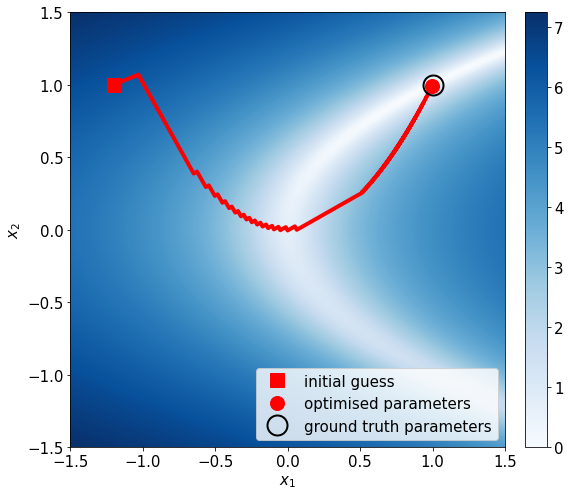

In [122]:
fig, ax = plt.subplots(figsize=(9,8))
ax.set(xlabel='$x_1$', ylabel='$x_2$')

domain = ax.imshow(np.log(w + 1), origin='lower', extent=[-1.5, 1.5, -1.5, 1.5], cmap='Blues')

ax.plot(x_optimisation[:, 0], x_optimisation[:, 1], 'r', linewidth=4)
ax.plot(*x_optimisation[0], 'rs', fillstyle='full', label='initial guess')
ax.plot(*x_optimisation[-1], 'ro', fillstyle='full', label='optimised parameters')
ax.plot(1, 1, 'ko', markeredgewidth=2, markersize=20, label='ground truth parameters')

fig.colorbar(domain, fraction=0.046, pad=0.04)
plt.legend(loc='lower right');